<a href="https://colab.research.google.com/github/Raziel-JKM/Finance_AI/blob/main/Code/Lec_4_3_(FAI)_Stock_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 금융AI: Stock Data Analysis
## 금융 AI, 중앙대학교 

### FinanceDataReader 설치 
* FinanceData.KR Open Source Financial data reader 
* https://financedata.github.io/FinanceDataReader/
* Install : \$ pip install finance-datareader (혹은 conda install finance-datareader) 
* FinanceDataReader 설치 (for 구글 Colab) : !pip install -q finance-datareader    
* 업그레이: \$ pip install --upgrade finance-datareader

## 오픈 API(Open Application Programming Interface, Open API, 공개 API)
* 하나의 웹 사이트에서 자신이 가진 기능을 이용할 수 있도록 공개한 프로그래밍 인터페이스
* 누구나 사용할 수 있도록 공개된 API를 말하며, 개발자에게 사유 응용 소프트웨어나 웹 서비스에 프로그래밍적인 권한을 제공
* 예: 공공데이터포털 (https://www.data.go.kr/), 네이버지도
* 데이터사용 증가에 따른 비용발생에 따라, 회원가입을 통한 공개키 발급, 유료화가 진행되기도 함

* Yahoo Finance 
* Alpha Vantage 
* FinanceDataReader  

## 변동성 지수 (Volatility Index) 

* VIX (Volatility Index)는 S&P500지수의 향후 30일 동안의 변동성에 대한 시장의 기대를 나타내는 지수 (미국 듀크 대학의 로버트 E. 웨일리 교수)
* 1개월 잔존 만기 콜옵션과 풋옵션 가격으로 계산 (초기에는 내재변동성으로 계산했었음)
* 1993년부터 시카고 옵션거래소(CBOE)에서 실시간으로 제공하고 있으며, 기초자산인 지수와 음(-)의 관계에 있음 
* 공포지수 (fear gauge)라고도 불림
* 한국 KOSPI200 ==> VKOSPI (2009년 4월부터 제공)
* 프랑스 VCAC, 독일 VDAX, VSTOXX

In [ ]:
# 먼저 필요한 module을 불러오자
import FinanceDataReader as fdr 
import seaborn as sns
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from datetime import datetime

In [ ]:
# 주가 데이터를 불러오자  
# (yahoo finance open API, 공식적으로 없어졌지만, 비공식적으로 서비스는 제공되고 있음)

end = datetime.today()
start = datetime(2000,1,1)

kospi = pdr.DataReader('^KS11','yahoo',start,end) # KOSPI
ss_yh = pdr.DataReader('005930.KS','yahoo',start,end) # YAHOO: amsung Electronics Co., Ltd. (원화 표시 KRW)
ss_f = fdr.DataReader('005930', start, end) # FDR: Samsung Electronics Co., Ltd. (원화 표시 KRW)
hm = pdr.DataReader('005380.KS','yahoo',start,end) # Hyundai Motor Company (원화 표시 KRW)

snp = pdr.DataReader('^GSPC','yahoo',start,end) #S&P500
nikkei = pdr.DataReader('^N225','yahoo',start,end) # Nikkei 225
euronext = pdr.DataReader('^N100','yahoo',start,end) # EURONEXT 100
vix = pdr.DataReader('^VIX','yahoo',start,end) # VIX

In [ ]:
kospi.head() 

High          Low         Open        Close      Volume  \
Date                                                                         
2000-01-04  1066.180054  1016.590027  1028.329956  1059.040039  19589800.0   
2000-01-05  1026.520020   984.049988  1006.869995   986.309998  25769600.0   
2000-01-06  1014.900024   953.500000  1013.950012   960.789978  20352300.0   
2000-01-07   970.159973   930.840027   949.169983   948.650024  21566400.0   
2000-01-10   994.940002   974.820007   979.669983   987.239990  24017500.0   

              Adj Close  
Date                     
2000-01-04  1059.040039  
2000-01-05   986.309998  
2000-01-06   960.789978  
2000-01-07   948.650024  
2000-01-10   987.239990

### Finance-datareader와 yahoo finance 데이터 셋 비교

In [ ]:
ss_yh.head()

High     Low    Open   Close      Volume  Adj Close
Date                                                             
2000-01-04  6110.0  5660.0  6000.0  6110.0  74195000.0   0.090599
2000-01-05  6060.0  5520.0  5800.0  5580.0  74680000.0   0.082740
2000-01-06  5780.0  5580.0  5750.0  5620.0  54390000.0   0.083333
2000-01-07  5670.0  5360.0  5560.0  5540.0  40305000.0   0.082147
2000-01-10  5770.0  5580.0  5600.0  5770.0  46880000.0   0.085558

In [ ]:
ss_f.head()

Open  High   Low  Close   Volume    Change
Date                                                  
2000-01-04  6000  6110  5660   6110  1483967  0.148496
2000-01-05  5800  6060  5520   5580  1493604 -0.086743
2000-01-06  5750  5780  5580   5620  1087810  0.007168
2000-01-07  5560  5670  5360   5540   806195 -0.014235
2000-01-10  5600  5770  5580   5770   937615  0.041516

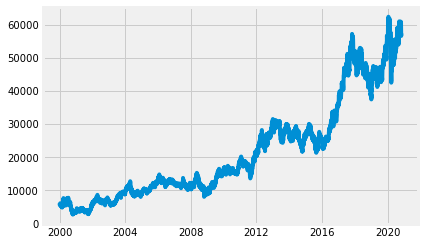

In [ ]:
ss1=ss_yh[['Close']]
plt.plot(ss1)

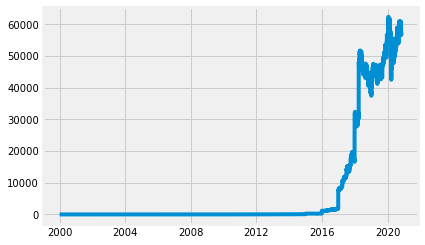

In [ ]:
ss1a=ss_yh[['Adj Close']]
plt.plot(ss1a)

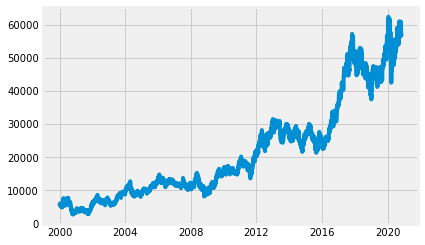

In [ ]:
ss2=ss_f[['Close']]
plt.plot(ss2)

In [ ]:
# Close price가 동일한 것으로 확인되었으니, 삼성전자 주가는 Close price를 사용하도록 해요 
ss = ss_yh
ss.head()

High     Low    Open   Close      Volume  Adj Close
Date                                                             
2000-01-04  6110.0  5660.0  6000.0  6110.0  74195000.0   0.090599
2000-01-05  6060.0  5520.0  5800.0  5580.0  74680000.0   0.082740
2000-01-06  5780.0  5580.0  5750.0  5620.0  54390000.0   0.083333
2000-01-07  5670.0  5360.0  5560.0  5540.0  40305000.0   0.082147
2000-01-10  5770.0  5580.0  5600.0  5770.0  46880000.0   0.085558

### 데이터 셋 정리 (인덱스, 개별 주식)

In [ ]:
eqt = pd.DataFrame({
    'SP500': snp['Adj Close'],
    'KOSPI': kospi['Adj Close'],
    'ss': ss['Close'],
    'hm': hm['Adj Close'],
    'nikkei': nikkei['Adj Close'],
    'euronext': euronext['Adj Close'],
    'VIX': vix['Adj Close']
}).dropna()

In [ ]:
eqt.head()

SP500        KOSPI      ss            hm        nikkei  \
Date                                                                       
2000-01-04  1399.420044  1059.040039  6110.0  13968.110352  19002.859375   
2000-01-05  1402.109985   986.309998  5580.0  14035.587891  18542.550781   
2000-01-06  1403.449951   960.789978  5620.0  13293.319336  18168.269531   
2000-01-07  1441.469971   948.650024  5540.0  13698.194336  18193.410156   
2000-01-11  1438.560059   981.330017  5770.0  13495.756836  18850.919922   

              euronext        VIX  
Date                               
2000-01-04  955.969971  27.010000  
2000-01-05  930.260010  26.410000  
2000-01-06  922.460022  25.730000  
2000-01-07  943.880005  21.719999  
2000-01-11  954.059998  22.500000

In [ ]:
# 참고: 다른 방법으로 머지하는 경우 
eqt1 = pd.merge(snp['Adj Close'], kospi['Adj Close'],left_index=True, right_index=True, how='inner')
eqt1.columns=['SP500','KOSPI'] 
eqt1.head() 

#참고: csv파일로 내보내기 
#eqt.to_csv(r'C:\Users\CAU\Dropbox\2020-2\data\stockdata.csv') 

SP500        KOSPI
Date                                
2000-01-04  1399.420044  1059.040039
2000-01-05  1402.109985   986.309998
2000-01-06  1403.449951   960.789978
2000-01-07  1441.469971   948.650024
2000-01-10  1457.599976   987.239990

### 수익률을 계산해보아요. (연속시간)

In [ ]:
# 연속시간 수익률 (로그 차분)
rtn= ( np.log(eqt) - np.log(eqt.shift(1)) )*100
rtn.columns=['r_sp','r_kp','r_ss' ,'r_hm','r_nk','r_ux','r_vx']
rtn.head()

r_sp      r_kp      r_ss      r_hm      r_nk      r_ux  \
Date                                                                     
2000-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2000-01-05  0.192034 -7.114745 -9.073800  0.481920 -2.452133 -2.726237   
2000-01-06  0.095522 -2.621486  0.714289 -5.433449 -2.039149 -0.842009   
2000-01-07  2.672995 -1.271589 -1.433716  3.000242  0.138281  2.295501   
2000-01-11 -0.202075  3.386886  4.067758 -1.488870  3.550227  1.072752   

                 r_vx  
Date                   
2000-01-04        NaN  
2000-01-05  -2.246446  
2000-01-06  -2.608511  
2000-01-07 -16.942415  
2000-01-11   3.528185

In [ ]:
pr = pd.merge(eqt,rtn,left_index=True, right_index=True, how='inner')
pr.head()

SP500        KOSPI      ss            hm        nikkei  \
Date                                                                       
2000-01-04  1399.420044  1059.040039  6110.0  13968.110352  19002.859375   
2000-01-05  1402.109985   986.309998  5580.0  14035.587891  18542.550781   
2000-01-06  1403.449951   960.789978  5620.0  13293.319336  18168.269531   
2000-01-07  1441.469971   948.650024  5540.0  13698.194336  18193.410156   
2000-01-11  1438.560059   981.330017  5770.0  13495.756836  18850.919922   

              euronext        VIX      r_sp      r_kp      r_ss      r_hm  \
Date                                                                        
2000-01-04  955.969971  27.010000       NaN       NaN       NaN       NaN   
2000-01-05  930.260010  26.410000  0.192034 -7.114745 -9.073800  0.481920   
2000-01-06  922.460022  25.730000  0.095522 -2.621486  0.714289 -5.433449   
2000-01-07  943.880005  21.719999  2.672995 -1.271589 -1.433716  3.000242   
2000-01-11  954.059998  22.500000 -0.202075  3.386886  4.067758 -1.488870   

                r_nk      r_ux       r_vx  
Date                                       
2000-01-04       NaN       NaN        NaN  
2000-01-05 -2.452133 -2.726237  -2.246446  
2000-01-06 -2.039149 -0.842009  -2.608511  
2000-01-07  0.138281  2.295501 -16.942415  
2000-01-11  3.550227  1.072752   3.528185

## 주가수익률의 전형적인 특성 (stylized facts of stock returns)

1. volatility clustering
2. leverage effect: negative skewness, asymmetric
3. Fat tail: leptokurtic     

## 시각화 (Visualization)

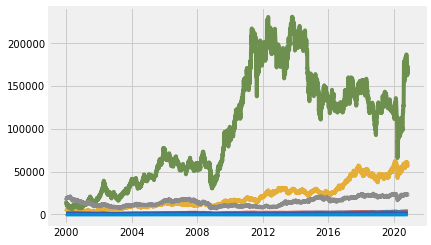

In [ ]:
plt.plot(eqt)

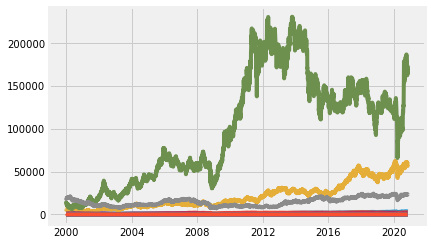

In [ ]:
plt.plot(pr)

In [ ]:
# 초기시점을 0 으로 기준으로 잡고 상대 주가 (relative stock price) 를 표현해보자 

pr_0 = eqt / eqt.iloc[0] - 1.0 


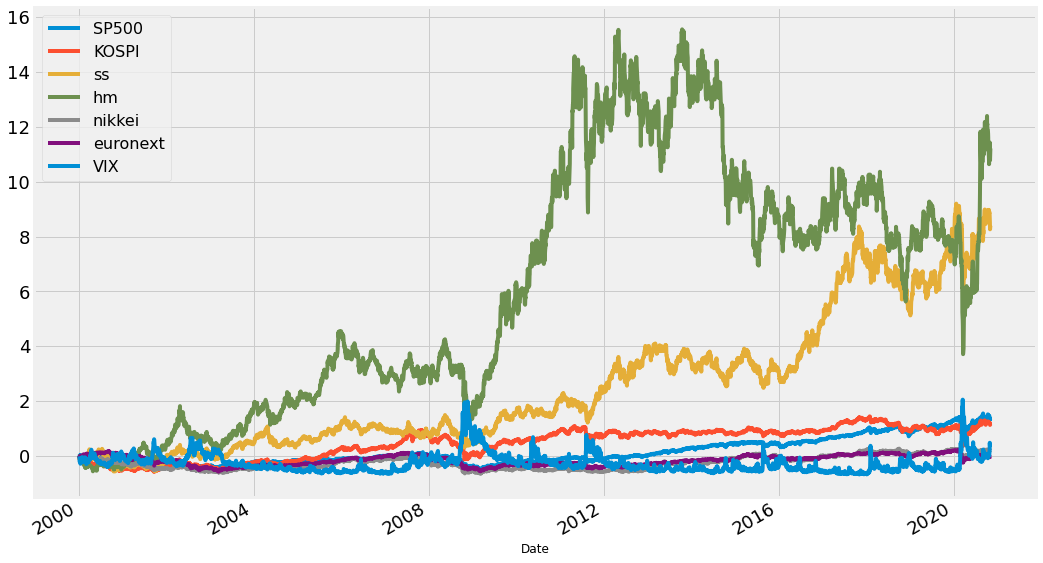

In [ ]:
# 상대가격을 그래프로 그려보아요. 
plt.rcParams['legend.fontsize'] = 16
pr_0.plot( figsize=(16,10), fontsize=18)

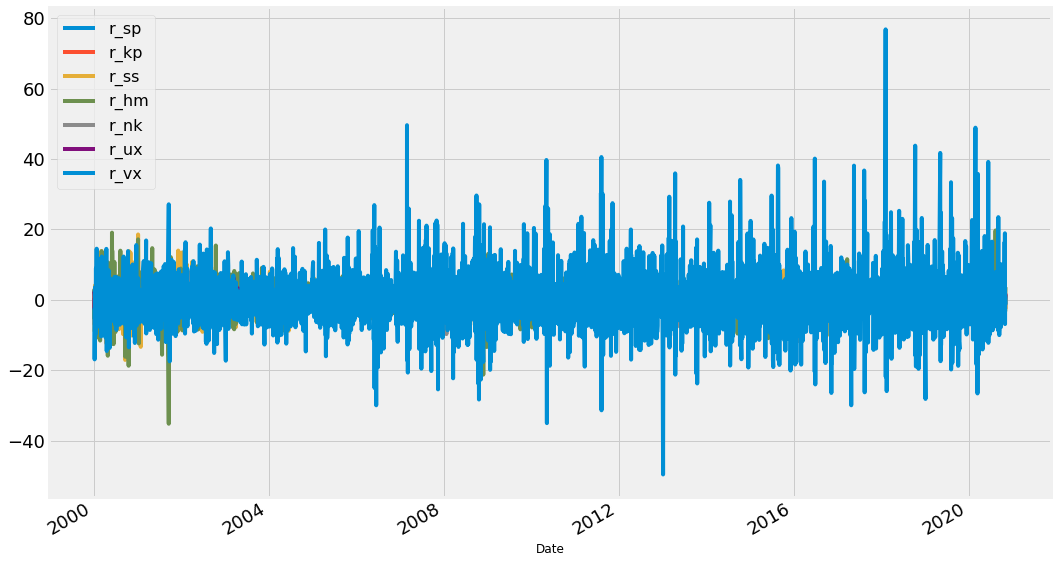

In [ ]:
#  수익률 그래프도 그려보아요 
#plt.rcParams['legend.fontsize'] = 16
rtn.plot( figsize=(16,10), fontsize=18)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4A45812E0>,
      dtype=object)

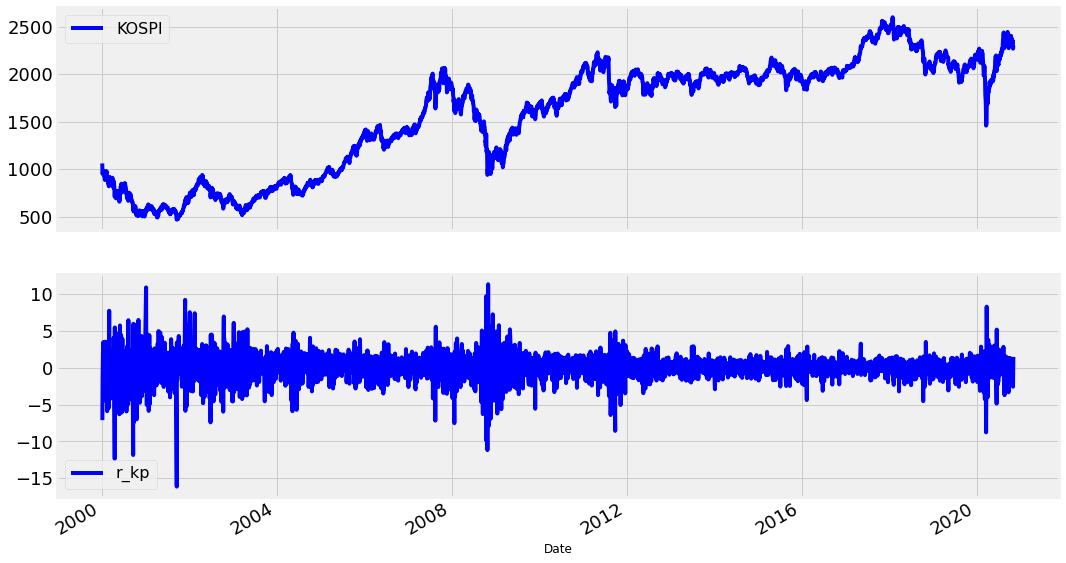

In [ ]:
plt.rcParams['legend.fontsize'] = 16
pr[['KOSPI','r_kp']].plot(subplots=True, style='b', figsize=(16,10), fontsize=18 )

Text(0.5, 1.0, 'KOSPI Return')

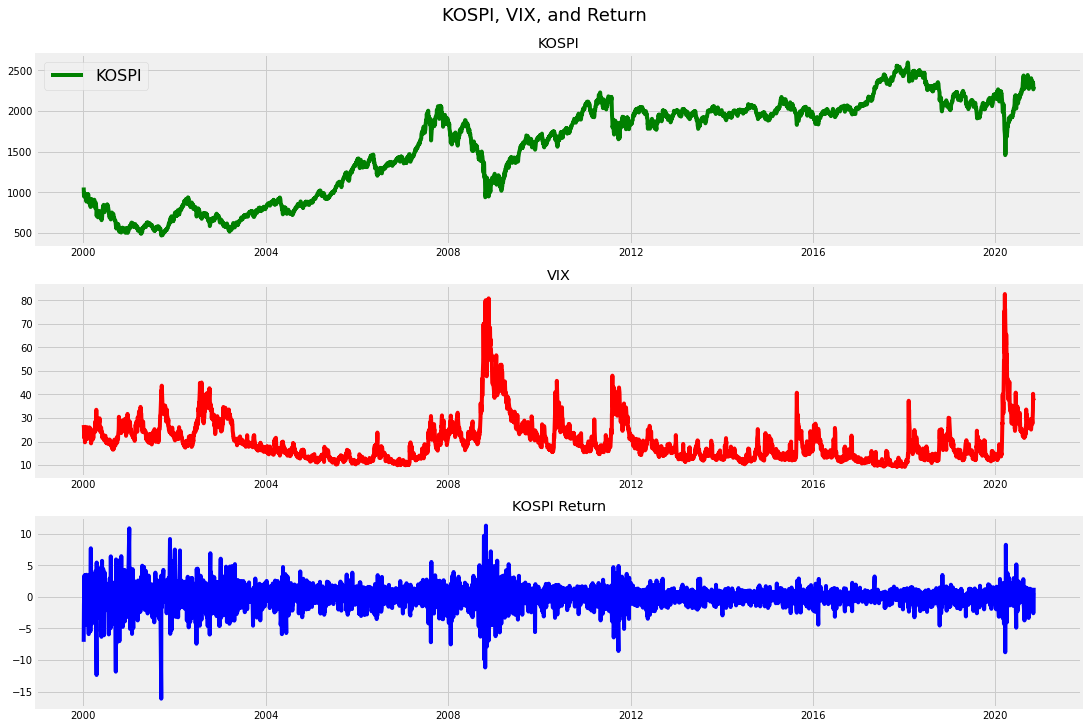

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(15,10), constrained_layout=True)
fig.suptitle('KOSPI, VIX, and Return', fontsize=18)

axs[0].plot(pr.index, pr['KOSPI'], 'g-', label='KOSPI')
#plt.xlabel('xlabel', fontsize=18)
#plt.ylabel('ylabel', fontsize=16)
axs[0].set_title('KOSPI')
axs[0].legend(['KOSPI'])

axs[1].plot(pr.index, pr['VIX'], 'r-')
axs[1].set_title('VIX')

axs[2].plot(pr.index, pr['r_kp'], 'b-')
axs[2].set_title('KOSPI Return')

### 주가와 주가수익률의 기초통계를 살펴보도록해요

In [ ]:
pr.describe()

SP500        KOSPI            ss             hm        nikkei  \
count  4673.000000  4673.000000   4673.000000    4673.000000   4673.000000   
mean   1634.029232  1574.549212  21385.172266   99199.797284  14532.173179   
std     652.098052   582.093961  15016.577423   63098.840519   4598.385176   
min     676.530029   468.760010   2730.000000    6343.006348   7054.979980   
25%    1161.060059   965.679993   9960.000000   42141.511719  10360.339844   
50%    1377.939941  1808.619995  15560.000000   98222.679688  14118.549805   
75%    2059.739990  2019.050049  28420.000000  147521.328125  17965.699219   
max    3580.840088  2598.189941  62300.000000  231049.718750  24270.619141   

          euronext          VIX         r_sp         r_kp         r_ss  \
count  4673.000000  4673.000000  4672.000000  4672.000000  4672.000000   
mean    811.925600    19.938474     0.018422     0.016601     0.047948   
std     174.920577     9.038978     1.324357     1.589399     2.411135   
min     419.950012     9.140000   -12.765220   -16.115370   -17.092181   
25%     660.869995    13.560000    -0.494290    -0.617832    -1.171987   
50%     818.559998    17.580000     0.067868     0.074481     0.000000   
75%     973.200012    23.620001     0.603330     0.762590     1.271690   
max    1182.099976    82.690002    10.423562    11.284352    18.550121   

              r_hm         r_nk         r_ux         r_vx  
count  4672.000000  4672.000000  4672.000000  4672.000000  
mean      0.053552     0.004359    -0.000190     0.007023  
std       2.867028     1.572377     1.413361     7.403745  
min     -35.231777   -12.111020   -12.751740   -49.640542  
25%      -1.342755    -0.749390    -0.631443    -4.075968  
50%       0.000000     0.039567     0.055326    -0.549435  
75%       1.435009     0.847361     0.677150     3.451325  
max      19.695322    13.234592    12.378520    76.824503

In [ ]:
rtn.describe()

r_sp         r_kp         r_ss         r_hm         r_nk  \
count  4672.000000  4672.000000  4672.000000  4672.000000  4672.000000   
mean      0.018422     0.016601     0.047948     0.053552     0.004359   
std       1.324357     1.589399     2.411135     2.867028     1.572377   
min     -12.765220   -16.115370   -17.092181   -35.231777   -12.111020   
25%      -0.494290    -0.617832    -1.171987    -1.342755    -0.749390   
50%       0.067868     0.074481     0.000000     0.000000     0.039567   
75%       0.603330     0.762590     1.271690     1.435009     0.847361   
max      10.423562    11.284352    18.550121    19.695322    13.234592   

              r_ux         r_vx  
count  4672.000000  4672.000000  
mean     -0.000190     0.007023  
std       1.413361     7.403745  
min     -12.751740   -49.640542  
25%      -0.631443    -4.075968  
50%       0.055326    -0.549435  
75%       0.677150     3.451325  
max      12.378520    76.824503

In [ ]:
# 우리가 원하는 통계량이 모두 포한된 기초통계표를 만들어 보아요 
df=pr
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

               SP500          KOSPI            ss            hm        nikkei  \
count    4673.000000    4673.000000  4.673000e+03  4.673000e+03  4.673000e+03   
mean     1634.029232    1574.549212  2.138517e+04  9.919980e+04  1.453217e+04   
std       652.098052     582.093961  1.501658e+04  6.309884e+04  4.598385e+03   
min       676.530029     468.760010  2.730000e+03  6.343006e+03  7.054980e+03   
25%      1161.060059     965.679993  9.960000e+03  4.214151e+04  1.036034e+04   
50%      1377.939941    1808.619995  1.556000e+04  9.822268e+04  1.411855e+04   
75%      2059.739990    2019.050049  2.842000e+04  1.475213e+05  1.796570e+04   
max      3580.840088    2598.189941  6.230000e+04  2.310497e+05  2.427062e+04   
var    425231.868870  338833.379786  2.254976e+08  3.981464e+09  2.114515e+07   
skew        1.005067      -0.438710  9.164467e-01  2.250149e-01  3.570794e-01   
kurt       -0.045261      -1.176940 -2.569117e-01 -1.213205e+00 -1.097944e+00   

           euronext        

In [ ]:
# 수익률만의 기초통계
df=rtn
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              r_sp         r_kp         r_ss         r_hm         r_nk  \
count  4672.000000  4672.000000  4672.000000  4672.000000  4672.000000   
mean      0.018422     0.016601     0.047948     0.053552     0.004359   
std       1.324357     1.589399     2.411135     2.867028     1.572377   
min     -12.765220   -16.115370   -17.092181   -35.231777   -12.111020   
25%      -0.494290    -0.617832    -1.171987    -1.342755    -0.749390   
50%       0.067868     0.074481     0.000000     0.000000     0.039567   
75%       0.603330     0.762590     1.271690     1.435009     0.847361   
max      10.423562    11.284352    18.550121    19.695322    13.234592   
var       1.753922     2.526188     5.813573     8.219848     2.472368   
skew     -0.450850    -0.605883     0.048619    -0.401712    -0.451577   
kurt     10.242837     8.896772     5.541865    10.327559     6.604852   

              r_ux         r_vx  
count  4672.000000  4672.000000  
mean     -0.000190     0.007023  
std      

### 데이터의 표본분포를 파악하기 위해서 히스토그램을 그려보아요. 

Text(0, 0.5, 'Relative Freqeuncy')

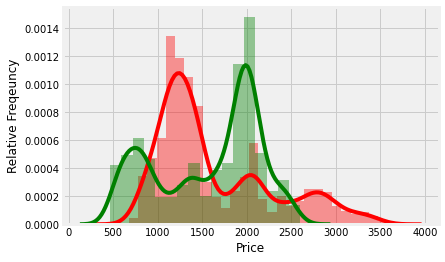

In [ ]:
# 주가의 분포를 파악하기 위해서 히스토그램을 그려보아요. 
plt.rcParams['legend.fontsize'] = 16

sns.distplot(pr['SP500'],  label='S&P500', color='red') 
sns.distplot(pr['KOSPI'],  label='KOSPI', color='g')
plt.xlabel('Price')
plt.ylabel('Relative Freqeuncy')  

Text(0, 0.5, 'Freqeuncy')

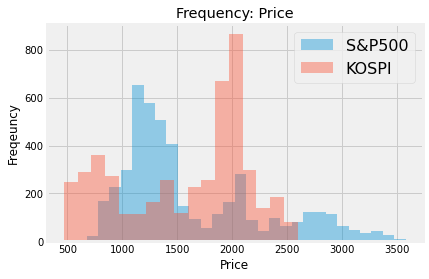

In [ ]:
# Frequency

sns.distplot(pr['SP500'], kde = False, label='S&P500')
sns.distplot(pr['KOSPI'], kde = False, label='KOSPI')
# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Frequency: Price')
plt.xlabel('Price')
plt.ylabel('Freqeuncy')  

Text(0, 0.5, 'Density')

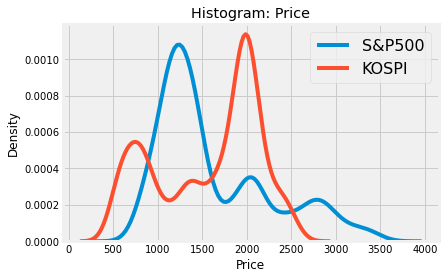

In [ ]:
# Kernel Density Estimation

sns.distplot(pr['SP500'], hist = False, kde = True, label='S&P500')
sns.distplot(pr['KOSPI'], hist = False, kde = True, label='KOSPI')
# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Histogram: Price')
plt.xlabel('Price')
plt.ylabel('Density')  

Text(0, 0.5, 'Relative Freqeuncy')

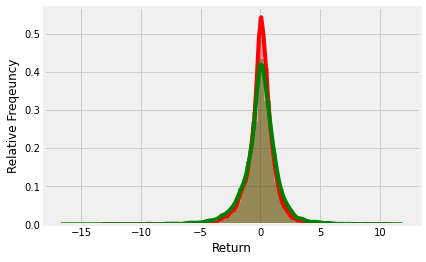

In [ ]:
# 주가 수익률의 분포를 파악하기 위해서 히스토그램을 그려보아요. 
plt.rcParams['legend.fontsize'] = 16

sns.distplot(pr['r_sp'],  label='S&P500', color='red') 
sns.distplot(pr['r_kp'],  label='KOSPI', color='g')
plt.xlabel('Return')
plt.ylabel('Relative Freqeuncy')  

Text(0, 0.5, 'Density')

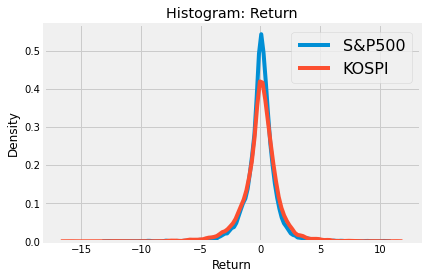

In [ ]:
# Kernel Density Estimation

sns.distplot(pr['r_sp'], hist = False, kde = True, label='S&P500')
sns.distplot(pr['r_kp'], hist = False, kde = True, label='KOSPI')
# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Histogram: Return')
plt.xlabel('Return')
plt.ylabel('Density')  

### 상관관계에 대해서 살펴보아요. 

In [ ]:
pr.corr()

SP500     KOSPI        ss        hm    nikkei  euronext  \
SP500     1.000000  0.713803  0.927066  0.471291  0.887756  0.738822   
KOSPI     0.713803  1.000000  0.821390  0.838116  0.540167  0.411541   
ss        0.927066  0.821390  1.000000  0.642079  0.719575  0.516613   
hm        0.471291  0.838116  0.642079  1.000000  0.198974  0.084849   
nikkei    0.887756  0.540167  0.719575  0.198974  1.000000  0.904252   
euronext  0.738822  0.411541  0.516613  0.084849  0.904252  1.000000   
VIX      -0.289232 -0.300796 -0.245371 -0.297472 -0.353731 -0.382114   
r_sp      0.027520  0.016457  0.018684  0.020998  0.001515  0.009978   
r_kp      0.002651  0.016524  0.009523  0.010829 -0.000897  0.007582   
r_ss      0.001635  0.010344  0.013586  0.008140 -0.007578 -0.002738   
r_hm     -0.007966 -0.005069 -0.005621  0.004262 -0.014251 -0.003752   
r_nk      0.020234  0.030398  0.028465  0.029506  0.026365  0.015243   
r_ux      0.016689  0.010427  0.009991  0.014477  0.007333  0.029227   
r_vx      0.003852  0.014145  0.011579  0.006821  0.025185  0.011085   

               VIX      r_sp      r_kp      r_ss      r_hm      r_nk  \
SP500    -0.289232  0.027520  0.002651  0.001635 -0.007966  0.020234   
KOSPI    -0.300796  0.016457  0.016524  0.010344 -0.005069  0.030398   
ss       -0.245371  0.018684  0.009523  0.013586 -0.005621  0.028465   
hm       -0.297472  0.020998  0.010829  0.008140  0.004262  0.029506   
nikkei   -0.353731  0.001515 -0.000897 -0.007578 -0.014251  0.026365   
euronext -0.382114  0.009978  0.007582 -0.002738 -0.003752  0.015243   
VIX       1.000000 -0.146060 -0.098494 -0.048641 -0.047733 -0.122473   
r_sp     -0.146060  1.000000  0.234322  0.155680  0.128739  0.203571   
r_kp     -0.098494  0.234322  1.000000  0.765169  0.629087  0.608445   
r_ss     -0.048641  0.155680  0.765169  1.000000  0.457559  0.451190   
r_hm     -0.047733  0.128739  0.629087  0.457559  1.000000  0.326086   
r_nk     -0.122473  0.203571  0.608445  0.451190  0.326086  1.000000   
r_ux     -0.139750  0.610402  0.375962  0.266989  0.198042  0.402772   
r_vx      0.097201 -0.725178 -0.164882 -0.100695 -0.078832 -0.156931   

              r_ux      r_vx  
SP500     0.016689  0.003852  
KOSPI     0.010427  0.014145  
ss        0.009991  0.011579  
hm        0.014477  0.006821  
nikkei    0.007333  0.025185  
euronext  0.029227  0.011085  
VIX      -0.139750  0.097201  
r_sp      0.610402 -0.725178  
r_kp      0.375962 -0.164882  
r_ss      0.266989 -0.100695  
r_hm      0.198042 -0.078832  
r_nk      0.402772 -0.156931  
r_ux      1.000000 -0.479754  
r_vx     -0.479754  1.000000

In [ ]:
rtn.corr()

r_sp      r_kp      r_ss      r_hm      r_nk      r_ux      r_vx
r_sp  1.000000  0.234322  0.155680  0.128739  0.203571  0.610402 -0.725178
r_kp  0.234322  1.000000  0.765169  0.629087  0.608445  0.375962 -0.164882
r_ss  0.155680  0.765169  1.000000  0.457559  0.451190  0.266989 -0.100695
r_hm  0.128739  0.629087  0.457559  1.000000  0.326086  0.198042 -0.078832
r_nk  0.203571  0.608445  0.451190  0.326086  1.000000  0.402772 -0.156931
r_ux  0.610402  0.375962  0.266989  0.198042  0.402772  1.000000 -0.479754
r_vx -0.725178 -0.164882 -0.100695 -0.078832 -0.156931 -0.479754  1.000000

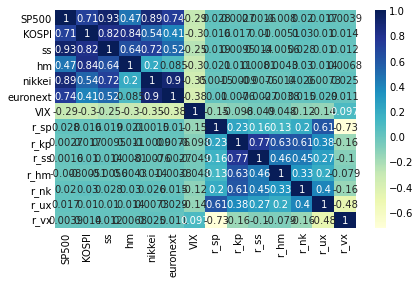

In [ ]:
sns.heatmap(pr.corr(), annot=True, cmap="YlGnBu")
plt.show()

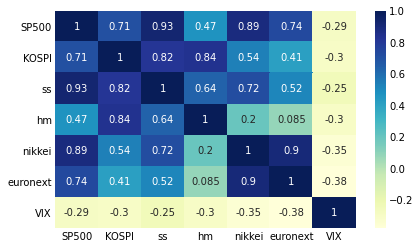

In [ ]:
sns.heatmap(eqt.corr(), annot=True, cmap="YlGnBu")
plt.show()

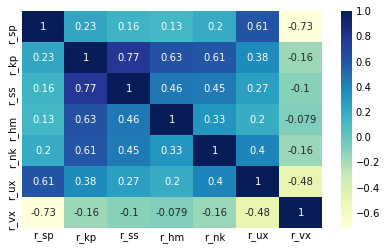

In [ ]:
sns.heatmap(rtn.corr(), annot=True, cmap="YlGnBu")
plt.show()

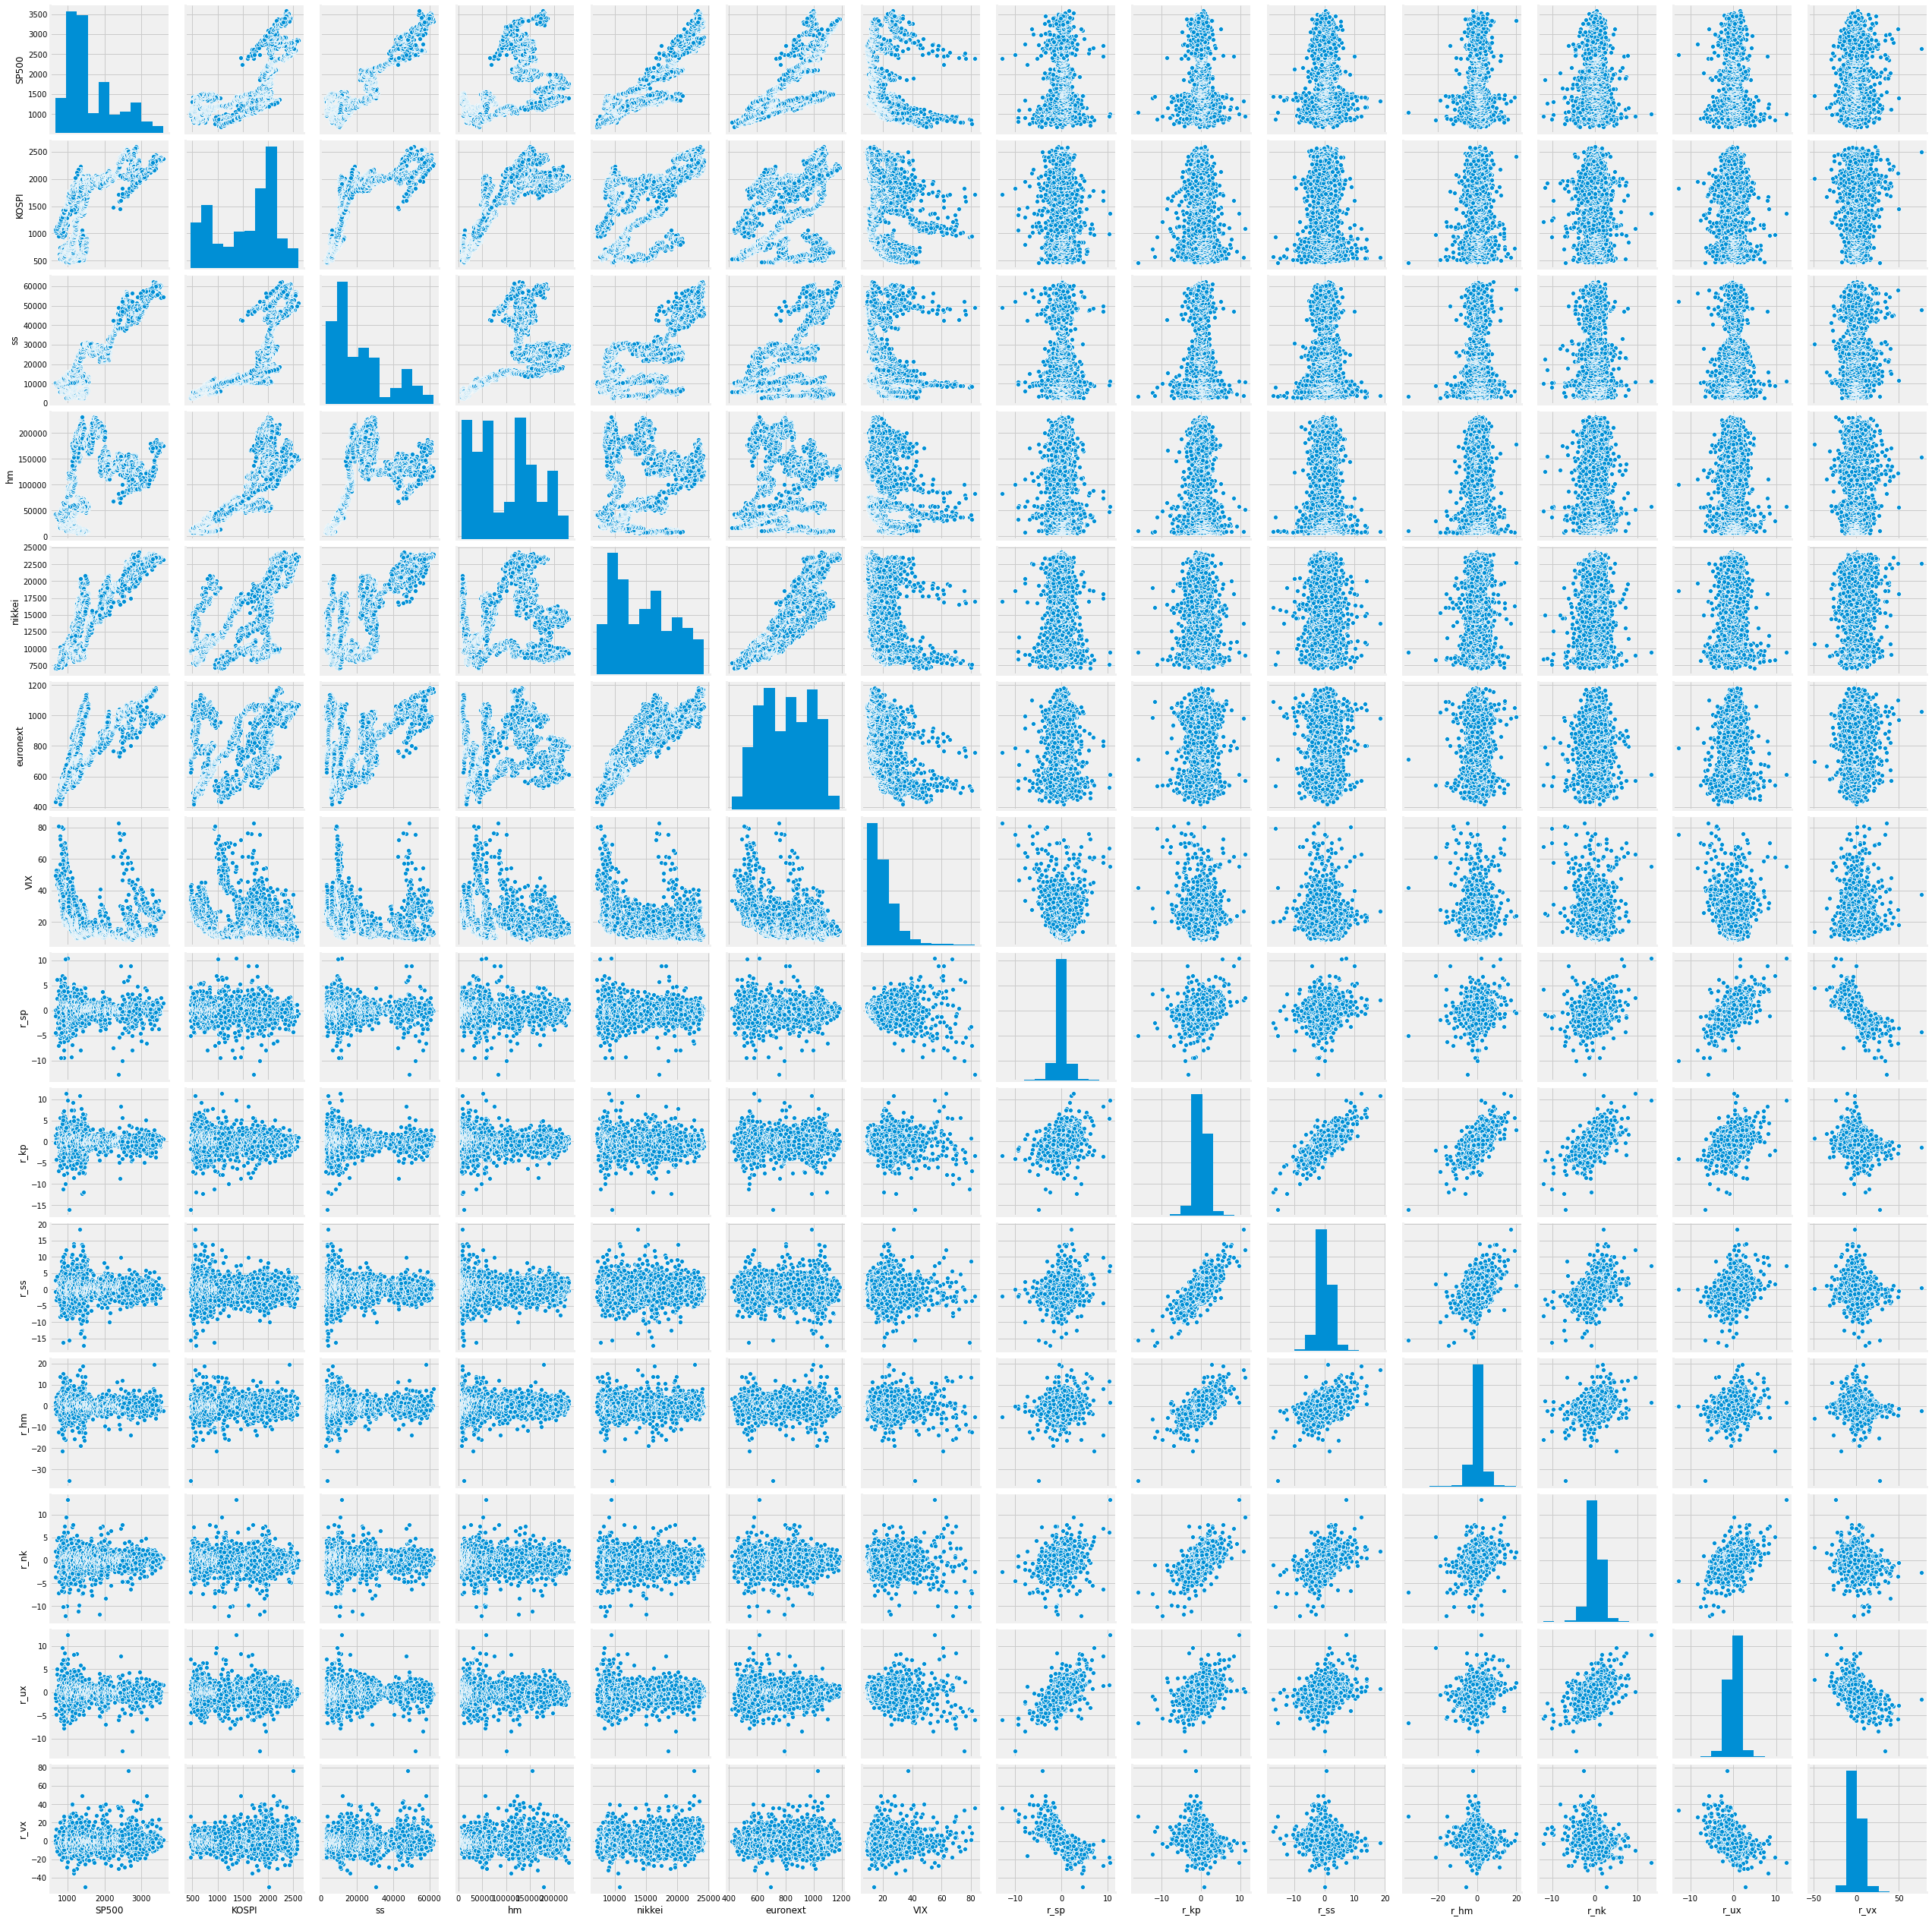

In [ ]:
# pariplot: price

sns.pairplot(pr)

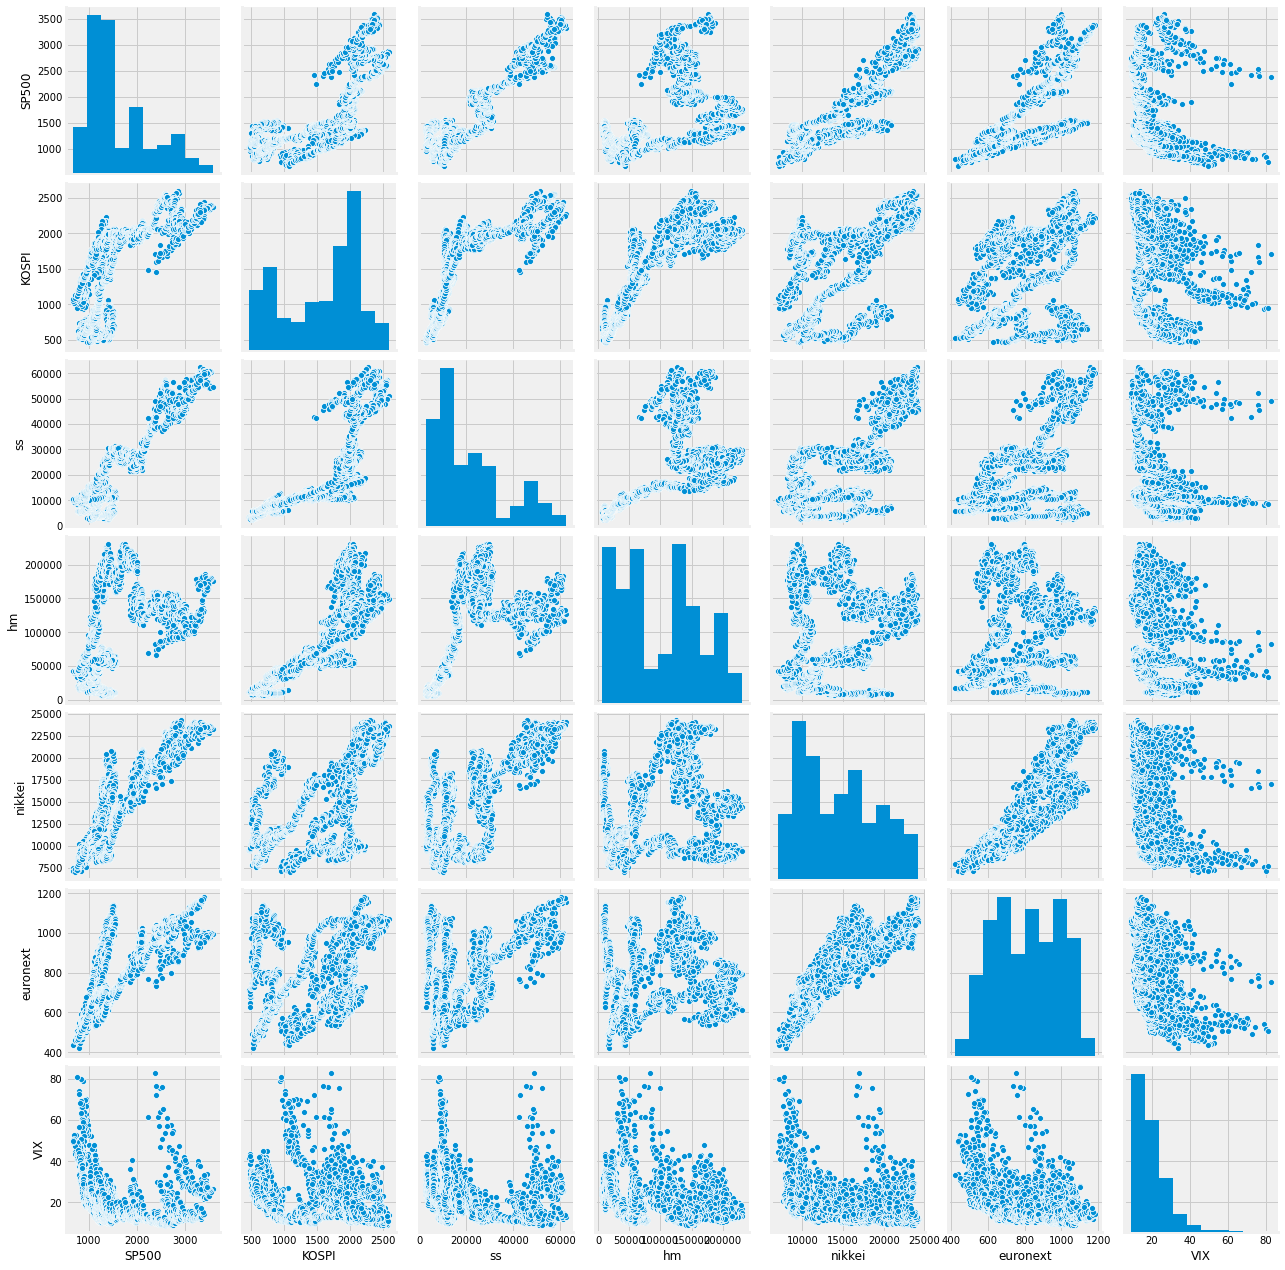

In [ ]:
# pariplot: return

sns.pairplot(eqt)

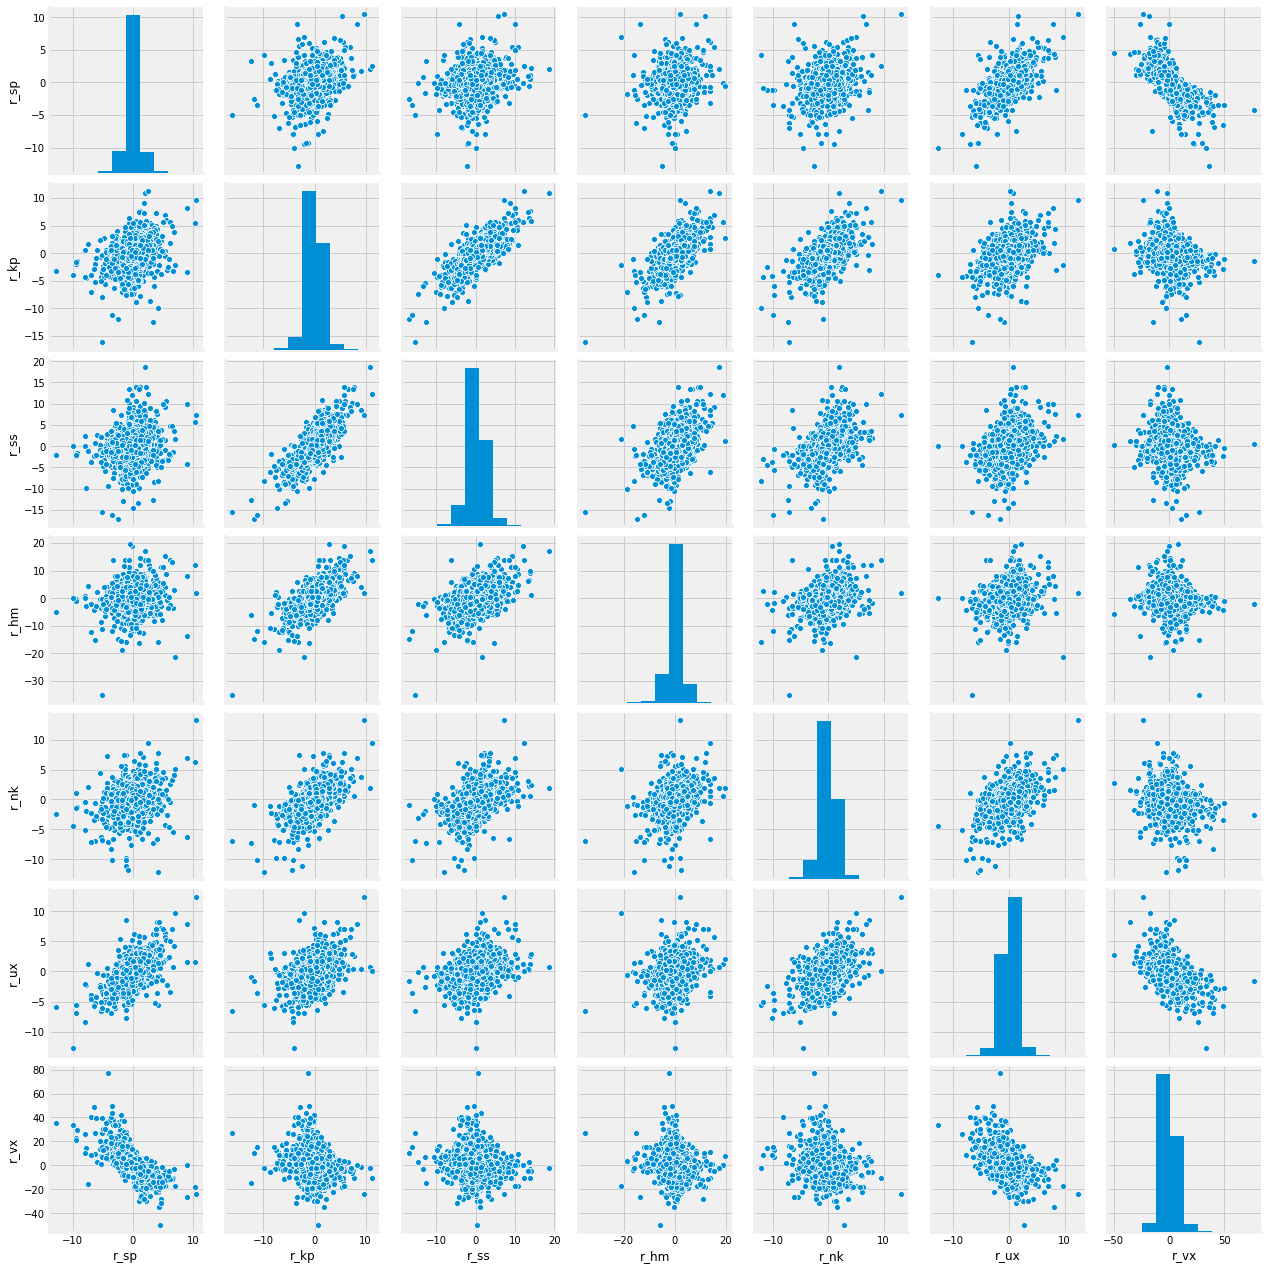

In [ ]:
# pariplot: return

sns.pairplot(rtn)